In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-accidents/US_Accidents_Dec21_updated.csv


# US accidents Exploratory data analysis
Todo - talk abot EDA
todo - talk abt dataset (source waht it contains hwo it will be useful)
   - kaggle
   - info abt accidents
   - can be useful to prevent accidents
   - this does not contain data from NY 

# **Steps to be followed**

Here’s the step by step process that I will follow:

🔍 Select a large real-world dataset from Kaggle

⚒ Perform data preparation & cleaning using Pandas & Numpy

🔁 Perform exploratory analysis & visualization using Matplotlib & Seaborn

🙋‍♂️ Ask & answer questions about the data in a Jupyter notebook

📝 Summarize your inferences & write a conclusion

📑 Document, publish, and present and your Jupyter notebook online

## Data preparation & cleaning using Pandas & Numpy

In [12]:
filename = '../input/us-accidents/US_Accidents_Dec21_updated.csv'

Load the file using pandas
look at soeminfo abot the data and column
fix any missing and incorrect values


In [13]:
import pandas as pd

df = pd.read_csv(filename)

### 1. Cities

In [14]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [15]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [16]:
df.info

<bound method DataFrame.info of                 ID  Severity           Start_Time             End_Time  \
0              A-1         3  2016-02-08 00:37:08  2016-02-08 06:37:08   
1              A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20   
2              A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39   
3              A-4         2  2016-02-08 06:51:45  2016-02-08 12:51:45   
4              A-5         3  2016-02-08 07:53:43  2016-02-08 13:53:43   
...            ...       ...                  ...                  ...   
2845337  A-2845338         2  2019-08-23 18:03:25  2019-08-23 18:32:01   
2845338  A-2845339         2  2019-08-23 19:11:30  2019-08-23 19:38:23   
2845339  A-2845340         2  2019-08-23 19:00:21  2019-08-23 19:28:49   
2845340  A-2845341         2  2019-08-23 19:00:21  2019-08-23 19:29:42   
2845341  A-2845342         2  2019-08-23 18:52:06  2019-08-23 19:21:31   

         Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi)  \
0       

In [17]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [18]:
numeric_df = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)
len(numeric_df.columns)

NameError: name 'numerics' is not defined

## Sorting sum of null values in decending order

In [19]:
df.isna().sum().sort_values(ascending= False)

Number                   1743911
Precipitation(in)         549458
Wind_Chill(F)             469643
Wind_Speed(mph)           157944
Wind_Direction             73775
Humidity(%)                73092
Weather_Condition          70636
Visibility(mi)             70546
Temperature(F)             69274
Pressure(in)               59200
Weather_Timestamp          50736
Airport_Code                9549
Timezone                    3659
Nautical_Twilight           2867
Civil_Twilight              2867
Sunrise_Sunset              2867
Astronomical_Twilight       2867
Zipcode                     1319
City                         137
Street                         2
Country                        0
Junction                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station                        0
Roundabout

## Getting the persentages of the missing values

In [20]:
missing_percentages = df.isna().sum().sort_values(ascending = False) / len(df)
missing_percentages

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
Country                  0.000000e+00
Junction                 0.000000e+00
Start_Time               0.000000e+00
End_Time                 0.000000e+00
Start_Lat                0.000000e+00
Turning_Loop             0.000000e+00
Traffic_Sign

In [21]:
type(missing_percentages)


pandas.core.series.Series

Now we can use this boolean series of true and false and we will use it as an index 
[missing_percentages != 0]

In [22]:
missing_percentages != 0

Number                    True
Precipitation(in)         True
Wind_Chill(F)             True
Wind_Speed(mph)           True
Wind_Direction            True
Humidity(%)               True
Weather_Condition         True
Visibility(mi)            True
Temperature(F)            True
Pressure(in)              True
Weather_Timestamp         True
Airport_Code              True
Timezone                  True
Nautical_Twilight         True
Civil_Twilight            True
Sunrise_Sunset            True
Astronomical_Twilight     True
Zipcode                   True
City                      True
Street                    True
Country                  False
Junction                 False
Start_Time               False
End_Time                 False
Start_Lat                False
Turning_Loop             False
Traffic_Signal           False
Traffic_Calming          False
Stop                     False
Station                  False
Roundabout               False
Railway                  False
No_Exit 

We will plot this on the bar chart

In [ ]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

Now we will remove the TMC, Number, End_lng, End_lat as we will not be using them.

In [23]:
df.drop(['Number','Wind_Chill(F)','TMC','End_lng', 'End_lat'],axis=1)
df

KeyError: "['TMC' 'End_lng' 'End_lat'] not found in axis"

## Exploratory analysis & visualization using Matplotlib & Seaborn

Numeric Columns we can analyse
1. City
2. Start Time
3. Start Lat, Start Long
4. Tempature
5. Weather condition

In [24]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [25]:
cities = df.City.unique()

len(cities)

11682

Getting the top cities by accident adn plotting them on a horizontal chart.

<AxesSubplot:>

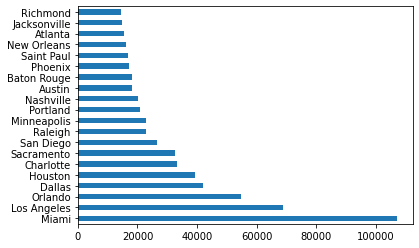

In [26]:
cities_by_accident = df.City.value_counts()
cities_by_accident[:20].plot(kind='barh')

Checking if the most populated city NYC is there in the data.

In [27]:
'New York' in df.cities

AttributeError: 'DataFrame' object has no attribute 'cities'

In [28]:
import seaborn as sns
sns.set_style("darkgrid")

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

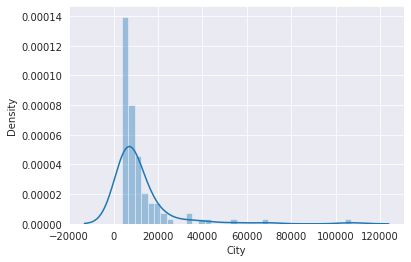

In [29]:
sns.distplot(cities_by_accident[:100])

We will now create two bucket
high accient cities >1000 accidents
Low accident cities <1000 accidents

In [32]:
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
low_accident_cities = cities_by_accident[cities_by_accident < 1000]


Percentage of cities with high accident

In [33]:
len(high_accident_cities)/len(cities)

0.04245848313644924

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

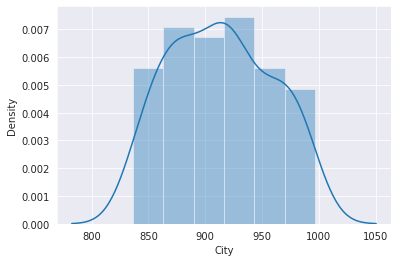

In [34]:
sns.distplot(low_accident_cities[:100])

We see that both high accident cities and low accident cities have an exponential distribution.

<AxesSubplot:xlabel='City', ylabel='Count'>

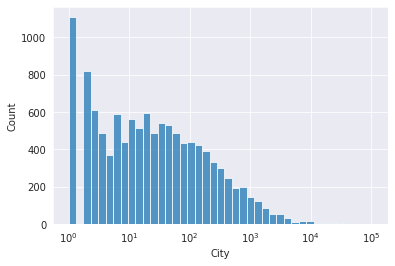

In [35]:
sns.histplot(cities_by_accident, log_scale=True)

In [38]:
cities_by_accident[cities_by_accident ==1]

Carney                          1
Waverly Hall                    1
Center Sandwich                 1
Glen Flora                      1
Sulphur Springs                 1
                               ..
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1110, dtype: int64

### 2. Start Time

In [39]:
df.Start_Time[0]

'2016-02-08 00:37:08'

Converting to string type to datetime format

In [41]:
df.Start_Time = pd.to_datetime(df.Start_Time)
df.Start_Time

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                  ...        
2845337   2019-08-23 18:03:25
2845338   2019-08-23 19:11:30
2845339   2019-08-23 19:00:21
2845340   2019-08-23 19:00:21
2845341   2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: datetime64[ns]

In [42]:
df.Start_Time[0]

Timestamp('2016-02-08 00:37:08')

Now we need to get hour of the day where the accidents happened

In [48]:
df.Start_Time.dt.hour

0           0
1           5
2           6
3           6
4           7
           ..
2845337    18
2845338    19
2845339    19
2845340    19
2845341    18
Name: Start_Time, Length: 2845342, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

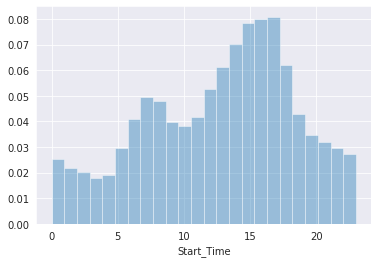

In [57]:
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist= True)

- A High percentage of accidents occur between 6-10am
- Another highest percentage is 3-6pm.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

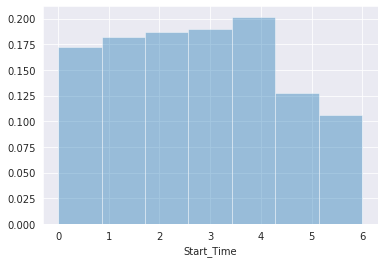

In [58]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist= True)

We can see that on weekends the number of accidents low.

<AxesSubplot:xlabel='Start_Time', ylabel='Density'>

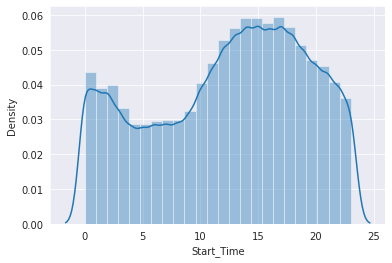

In [62]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, norm_hist= True)

<AxesSubplot:xlabel='Start_Time'>

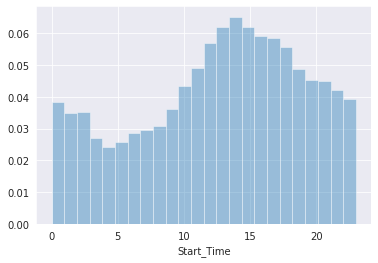

In [65]:
sat_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 5]
sns.distplot(sat_start_time.dt.hour, bins=24, kde=False, norm_hist= True)

*MONDAYS*

<AxesSubplot:xlabel='Start_Time'>

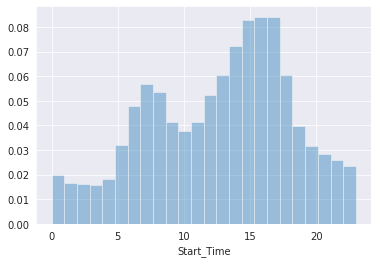

In [64]:
mondays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(mondays_start_time.dt.hour, bins=24, kde=False, norm_hist= True)

On saturdays and sundays it was the afternoons that most of the accidents occur unlike weekdays where it was between 6-10am and 3-6pm.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

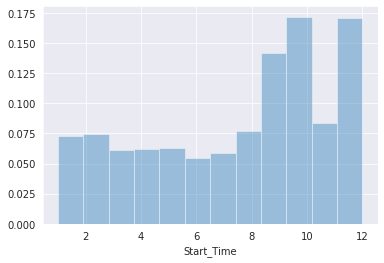

In [71]:
df_2019 = df[df.Start_Time.dt.year == 2019]
sns.distplot(df_2019.Start_Time.dt.month, bins =12 , kde=False, norm_hist=True)

This indicates that 

<AxesSubplot:xlabel='Start_Time'>

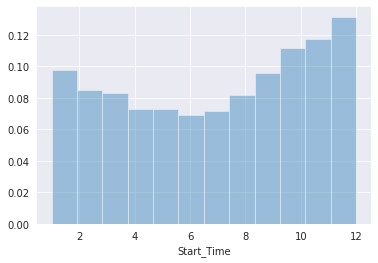

In [73]:
df_2018 = df[df.Start_Time.dt.year == 2018]
sns.distplot(df_2018.Start_Time.dt.month, bins =12 , kde=False, norm_hist=True)

<AxesSubplot:xlabel='Start_Time'>

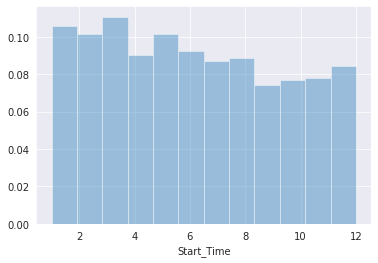

In [74]:
df_2017 = df[df.Start_Time.dt.year == 2017]
sns.distplot(df_2017.Start_Time.dt.month, bins =12 , kde=False, norm_hist=True)

Can you explain the month-wise trend of accidents
* Much of hte data is missing for 2016 aybe even 2017.
* there seems to be some issue with Bing data.

### Start lat and Start Long

In [77]:
df.Start_Lat

0          40.108910
1          39.865420
2          39.102660
3          41.062130
4          39.172393
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2845342, dtype: float64

In [78]:
df.Start_Lng

0          -83.092860
1          -84.062800
2          -84.524680
3          -81.537840
4          -84.492792
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2845342, dtype: float64

## Ask and Answer questions

1. Are there more accidents in warmer or colder areas
2. Which 5 states that have the highest no of accidents. how abt accidents per capita?
3. Does NYC show up in the data? If yes, why is hte count lower if this the most populated city.
4. Among the top 100 cities in number of accidents, which states do they belong to most frequently.
5. What time of the day are accidents most frequent in?
6. Which days of the week have the most accidents?
7. Which months have the most accidents?
8. What is the trend of the accidents YOY(increasing/decreasing)?
9. When is the accident per unit traffic is the highest?
10. IS the distribution by hour the same on weekends as on weekdays?





## Summarize your inferences & write a conclusion

Insights:

-No data for new york

-No of accidents per city decreases exponentially.

-Less than 5% of cities have more than 1000 accidents

-Over 1200 cities have reported just 1 accident(need to investigate).